### 1. Import Dependecies

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Load Data

In [2]:
df = pd.read_csv('data/processed/feature_engineered.csv')
df.head()

,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level,Like_Rate,Share_Rate,Comment_Rate,dominant_engagement_type
0,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High,0.081526,0.012762,0.004647,Likes
1,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium,0.051791,0.015847,0.006554,Likes
2,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium,0.089232,0.010753,0.009880,Likes
3,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low,0.138488,0.012732,0.040096,Likes
4,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium,2.641769,1.072688,0.098295,Likes


### 3. Outlier Detection techniques

#### 3.1 Distribution plots

In [3]:
df.nunique()

Platform                       4
Hashtag                       10
Content_Type                   6
Region                         8
Views                       4996
Likes                       4972
Shares                      4877
Comments                    4735
Engagement_Level               3
Like_Rate                   5000
Share_Rate                  5000
Comment_Rate                5000
dominant_engagement_type       3
dtype: int64

In [4]:
numerical_columns = ['Views', 'Likes', 'Shares', 'Comments','Like_Rate','Share_Rate','Comment_Rate']
categorical_columns = ['Platform', 'Hashtag', 'Content_Type', 'Region', 'Engagement_Level','dominant_engagement_type']

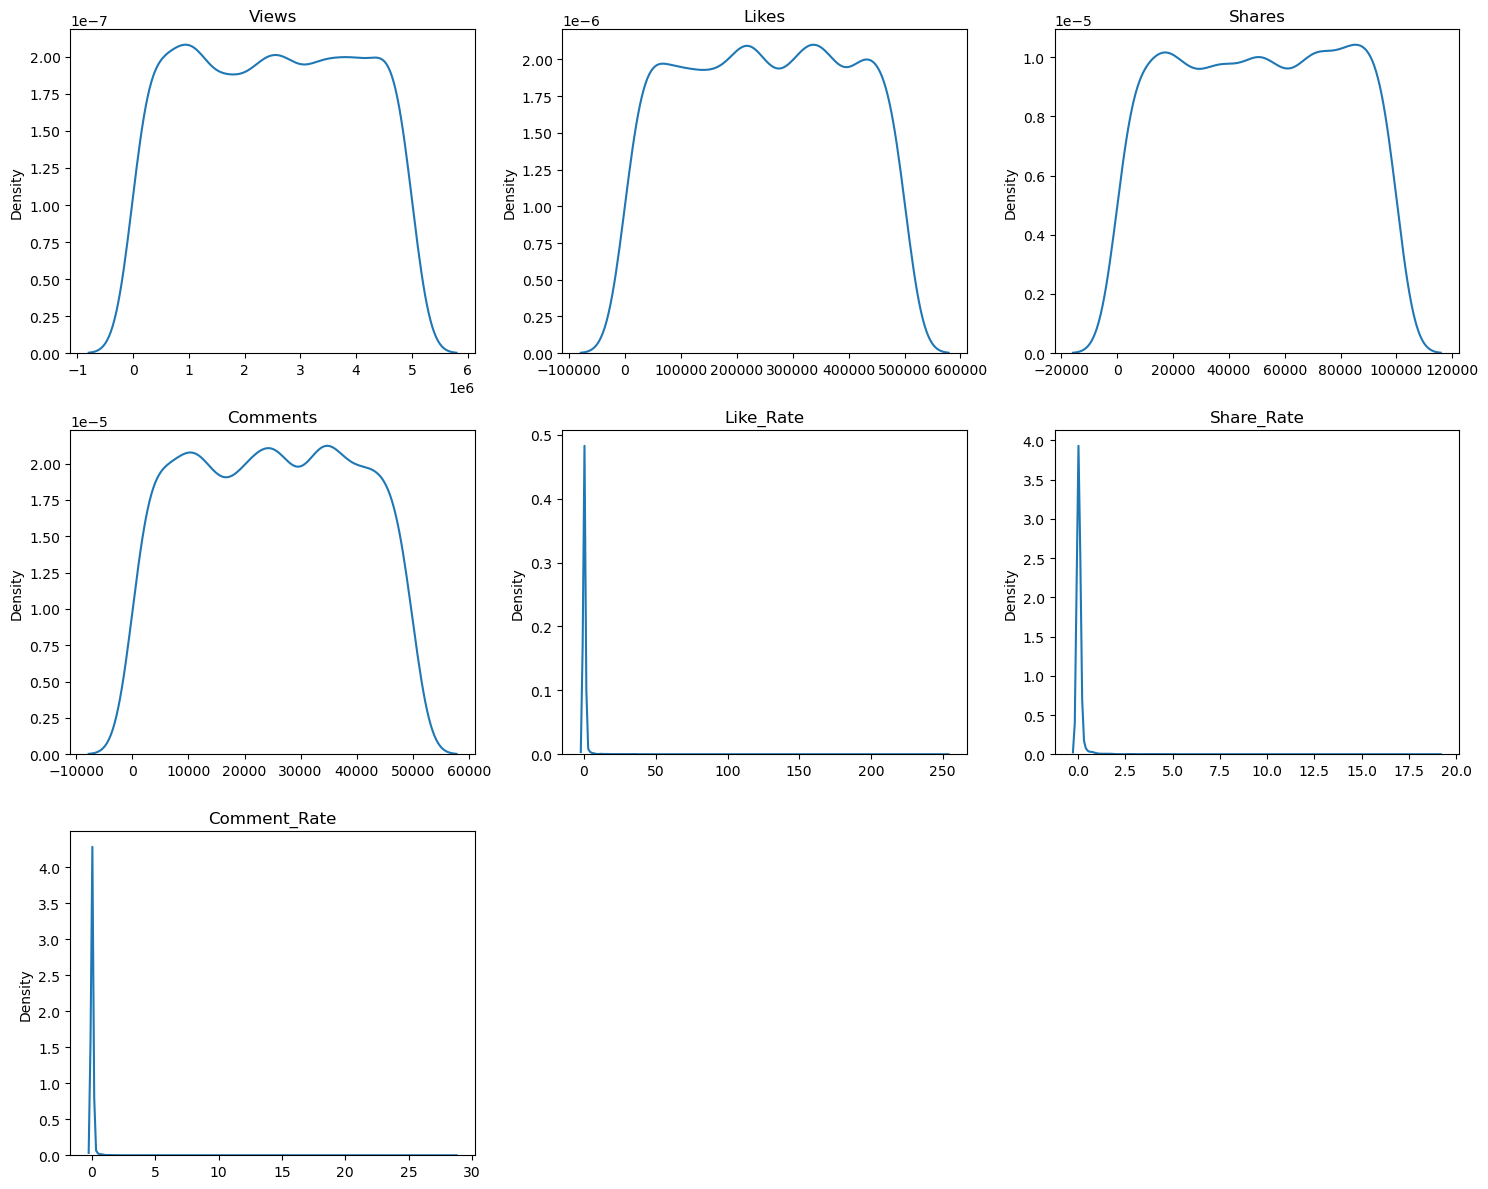

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid = 9 slots
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.kdeplot(data=df[col], ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xlabel('')

# Hide unused subplots
for j in range(len(numerical_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('figures/distribution_plots.jpg')
plt.show()

#### 3.2 Pie plots

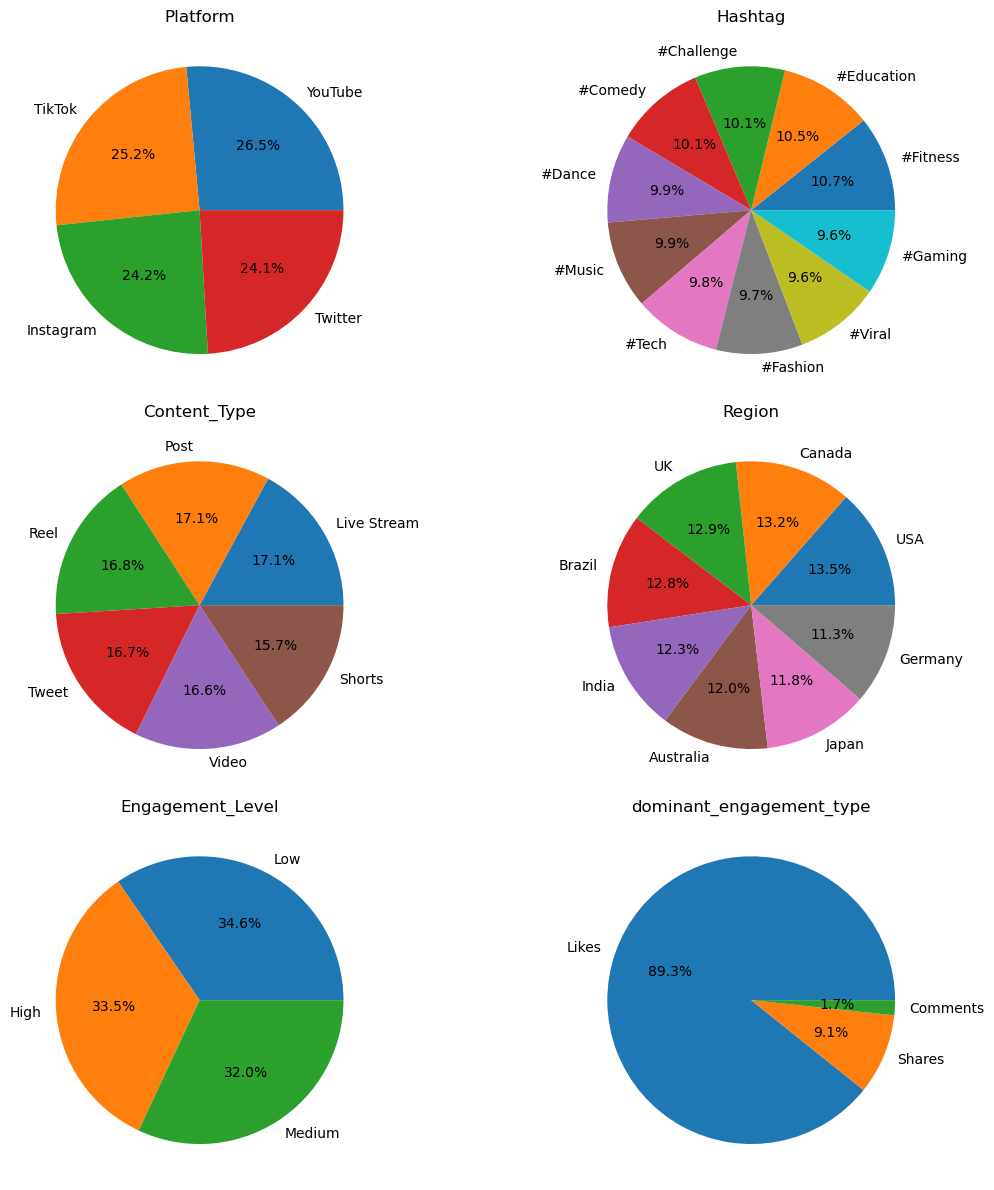

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten() 

for idx, col in enumerate(categorical_columns):
    df[col].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',
        ax=axes[idx]
    )
    axes[idx].set_title(col)
    axes[idx].set_ylabel('')

# Hide any unused subplot (the 6th one)
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('figures/pie_charts.jpg')
plt.show()


#### 3.3 Box Plots

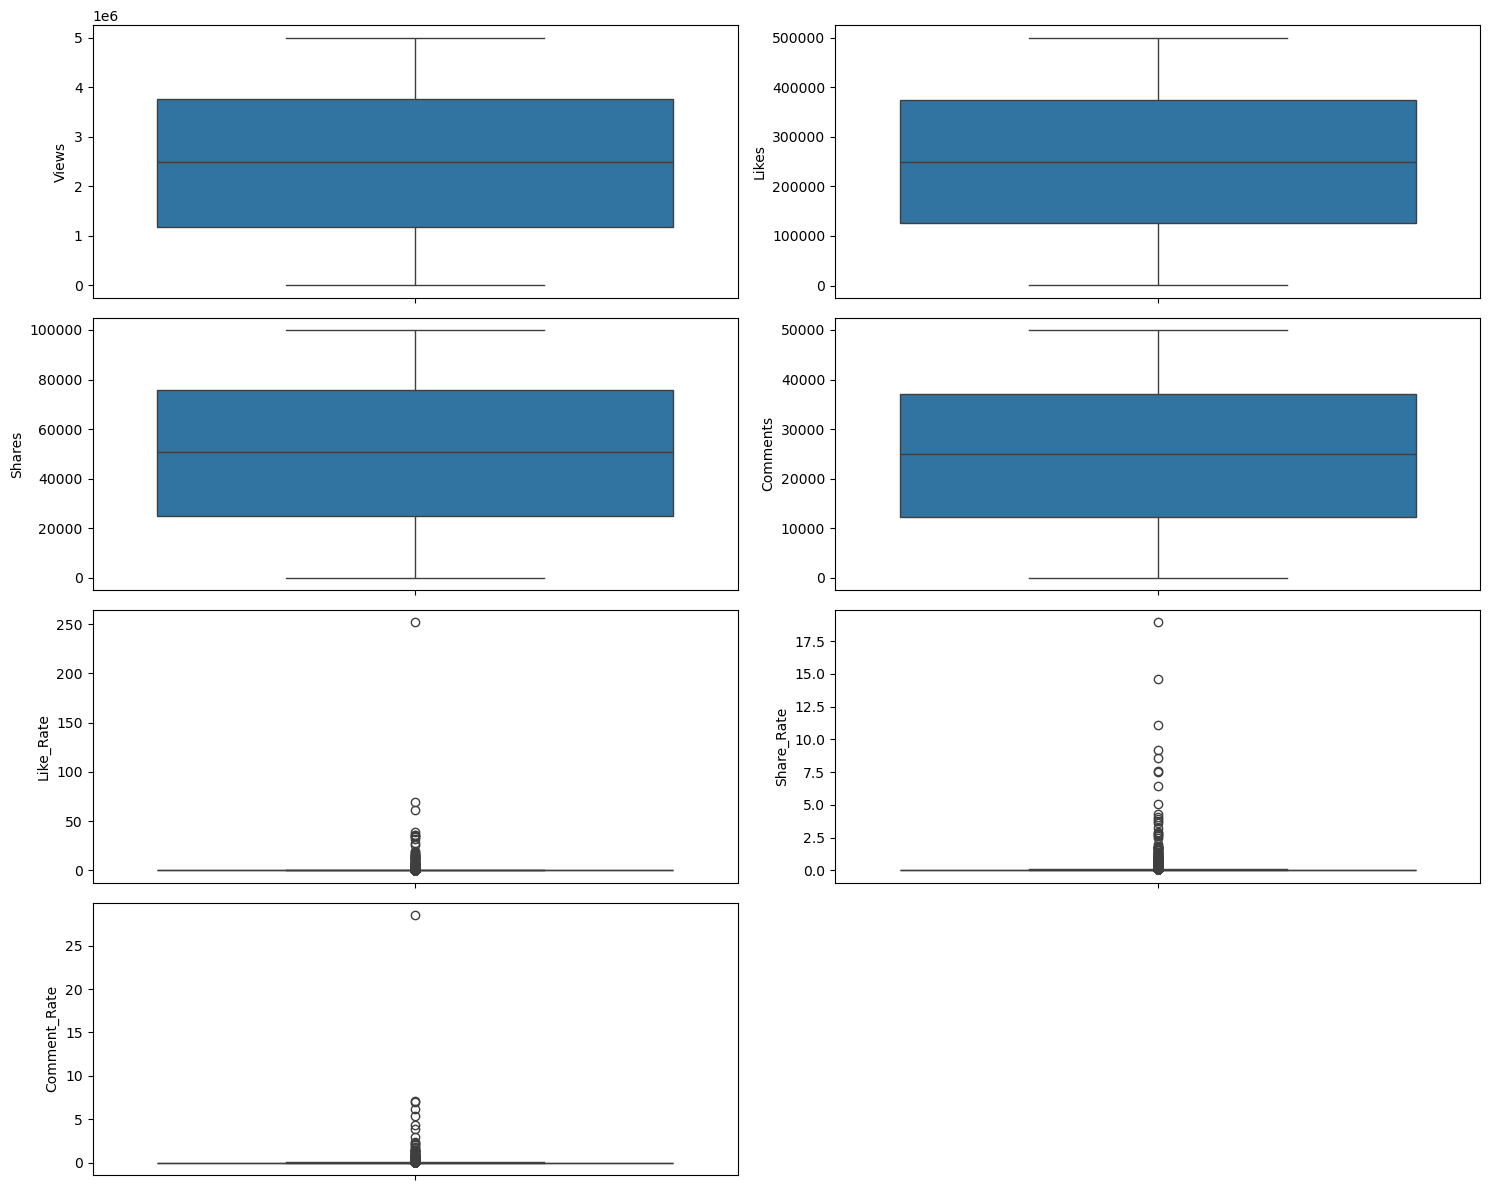

In [7]:
fig, axes = plt.subplots(4, 2, figsize=(15, 12))

sns.boxplot(data=df['Views'], ax=axes[0,0])
sns.boxplot(data=df['Likes'], ax=axes[0,1])
sns.boxplot(data=df['Shares'], ax=axes[1,0])
sns.boxplot(data=df['Comments'], ax=axes[1,1])
sns.boxplot(data=df['Like_Rate'], ax=axes[2,0])
sns.boxplot(data=df['Share_Rate'], ax=axes[2,1])
sns.boxplot(data=df['Comment_Rate'], ax=axes[3,0])

axes[3,1].axis('off')

plt.tight_layout()
plt.savefig('figures/box_plots.jpg')
plt.show()


#### 3.4 empirical rule / 3-sigma rule

In [8]:
def find_anomaly(data):
    mean = data.mean()
    std = data.std()

    upper_bound = mean + (3 * std)
    lower_bound = mean - (3 * std)

    return (data > upper_bound) | (data < lower_bound)

In [9]:
for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outlier_percentage = round(n_outliers / len(df), 3)
    print(f"{col} : {n_outliers} outliers ({n_outlier_percentage} %)")

Views : 0 outliers (0.0 %)
Likes : 0 outliers (0.0 %)
Shares : 0 outliers (0.0 %)
Comments : 0 outliers (0.0 %)
Like_Rate : 22 outliers (0.004 %)
Share_Rate : 32 outliers (0.006 %)
Comment_Rate : 17 outliers (0.003 %)


#### 3.5 IQR Method

In [10]:
def find_anomaly(columns):
        outliers = pd.DataFrame(False,index=df.index,columns=columns)

        for col in columns:
            df[col] = df[col].astype(float)
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1 

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = (df[col] < lower_bound) | (df[col] > upper_bound)
        
        return outliers

In [11]:

n_outliers = find_anomaly(numerical_columns)
outliers_count = n_outliers.sum(axis=1)
rows_to_remove = outliers_count >=2
df = df[~rows_to_remove]

In [12]:
df.to_csv( 'data/processed/Outliers_Handled.csv', index=False)